ECEN Project 1 by Group 6

Team members: Hareen Sai Vattikuti, Jessica Rumsey, Muzi Zhou,
Prajnadipta Kundu, Shuvam Chowdhury

Dataset: FashionMNIST ( https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST )


References: [1]	G. Eason, B. Noble, and I. N. Sneddon, “On certain integrals of Lipschitz-Hankel type involving products of Bessel functions,” Phil. Trans. Roy. Soc. London, vol. A247, pp. 529–551, April 1955. (references)
[2]	J. Clerk Maxwell, A Treatise on Electricity and Magnetism, 3rd ed., vol. 2. Oxford: Clarendon, 1892, pp.68–73.
[3]	I. S. Jacobs and C. P. Bean, “Fine particles, thin films and exchange anisotropy,” in Magnetism, vol. III, G. T. Rado and H. Suhl, Eds. New York: Academic, 1963, pp. 271–350.
[4]	K. Elissa, “Title of paper if known,” unpublished.
[5]	R. Nicole, “Title of paper with only first word capitalized,” J. Name Stand. Abbrev., in press.
[6]	Y. Yorozu, M. Hirano, K. Oka, and Y. Tagawa, “Electron spectroscopy studies on magneto-optical media and plastic substrate interface,” IEEE Transl. J. Magn. Japan, vol. 2, pp. 740–741, August 1987 [Digests 9th Annual Conf. Magnetics Japan, p. 301, 1982].
[7]	M. Young, The Technical Writer’s Handbook. Mill Valley, CA: University Science, 1989.
[8]	 K. Eves and J. Valasek, “Adaptive control for singularly perturbed systems examples,” Code Ocean, Aug. 2023. [Online]. Available: https://codeocean.com/capsule/4989235/tree
[9] ChatGPT

In [4]:
!pip install tensorflow

In [5]:
#Import Libraries
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Data Preparation

1) Data cleansing and transformation

2) Data splitting

In [7]:
#The Fashion-MNIST dataset consists of 28x28 grayscale images of clothing items.

# Loads the Fashion-MNIST dataset
# Split the dataset into training (x_train, y_train) and testing sets (x_test, y_test).

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# Each 28x28 image is reshaped into a single row with 784 columns (28x28=784) which effectively flattens the images.
# Therefore the images are transformes/reshaped to a 2D array

# Flatten each 28x28 image into a single row with 784 columns (28*28 = 784)
x_train = x_train.reshape(-1, 28*28) #The -1 in reshape means “infer the correct number of rows” based on the input data.
x_test = x_test.reshape(-1, 28*28)

# Split the original training data (60,000 samples) into 50,000 for training and 10,000 for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=42)

# converts the flattened training, validation, and testing image datasets into a DataFrame where each row represents one image.
train_df = pd.DataFrame(x_train)
train_df['label'] = y_train # Adds a new column called label to the DataFrame, representing the labels of each image.

val_df = pd.DataFrame(x_val)
val_df['label'] = y_val

test_df = pd.DataFrame(x_test)
test_df['label'] = y_test

# Save the DataFrames to CSV files
train_df.to_csv('fashion_mnist_train.csv', index=False)
val_df.to_csv('fashion_mnist_val.csv', index=False)
test_df.to_csv('fashion_mnist_test.csv', index=False)

# Print out the sizes to confirm the split
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")



Training set size: 50000
Validation set size: 10000
Test set size: 10000


In [8]:
print("Display of a few rows of the Training Dataset")
train_df.head()

Display of a few rows of the Training Dataset


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,56,175,0,0,5
1,0,0,0,0,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,73,...,59,64,61,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,2,0,0,...,3,0,87,220,214,165,0,0,0,4


In [9]:
print("Display of a few rows of the Validation Dataset")
val_df.head()

Display of a few rows of the Validation Dataset


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0,0,0,0,0,0,0,1,0,1,...,0,29,136,105,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [10]:
print("Display of a few rows of the Testing Dataset")
test_df.head()

Display of a few rows of the Testing Dataset


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6


In [11]:
#Checks for missing values in training, Validation, and testing dataframes

train_nulls = train_df.isnull().sum().sum()  # Finds total null values in training set
val_nulls = val_df.isnull().sum().sum()  # Finds total null values in Validation set
test_nulls = test_df.isnull().sum().sum()    # Finds total null values int testing set


print(f"Training set contains {train_nulls} null values.")

print(f"Validation set contains {val_nulls} null values.")

print(f"Test set contains {test_nulls} null values.")

# Checks for duplicates in the training, Validation, and testing dataframes
train_duplicates = train_df.duplicated().sum()  # Counts duplicate rows in the training set
val_duplicates = val_df.duplicated().sum()  # Counts duplicate rows in the Validation set
test_duplicates = test_df.duplicated().sum()    # Counts duplicate rows in the test set

print(f"Training set contains {train_duplicates} duplicate rows.")

print(f"Validation set contains {val_duplicates} duplicate rows.")

print(f"Test set contains {test_duplicates} duplicate rows.")

Training set contains 0 null values.
Validation set contains 0 null values.
Test set contains 0 null values.
Training set contains 0 duplicate rows.
Validation set contains 0 duplicate rows.
Test set contains 0 duplicate rows.


Exploratory Data Analysis (EDA)

1) Descriptive statistics (e.g., class distributions, data statistics)

(b) Data visualization (e.g., plot examples from classes, dimensionality
reduction approach to show data)

In [13]:
# Checks data dimension of Training, Validation, and Testing Dataframe by using .shape

print(f'Shape of Training dataframe : {train_df.shape}')
print(f'Shape of Validation dataframe : {val_df.shape}')
print(f'Shape of Testing dataframe : {test_df.shape}')


Shape of Training dataframe : (50000, 785)
Shape of Validation dataframe : (10000, 785)
Shape of Testing dataframe : (10000, 785)


In [14]:
#Checks types of data by .info() ; .dtype

summary_stats_train = train_df.info()
print("Summary Statistics for Training DF:\n", summary_stats_train,"\n")

summary_stats_val = val_df.info()
print("Summary Statistics for Validation DF:\n", summary_stats_val,"\n")

summary_stats_test = test_df.info()
print("Summary Statistics for Testing DF:\n", summary_stats_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 785 entries, 0 to label
dtypes: uint8(785)
memory usage: 37.4 MB
Summary Statistics for Training DF:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to label
dtypes: uint8(785)
memory usage: 7.5 MB
Summary Statistics for Validation DF:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to label
dtypes: uint8(785)
memory usage: 7.5 MB
Summary Statistics for Testing DF:
 None


In [15]:
# For quantitative variable, generates a table for the count, mean, standard deviation, minimum and maximum values and the quartiles of the data

stats_summary_train = train_df.describe()
print("Train DF Summary:\n", stats_summary_train)

stats_summary_val = val_df.describe()
print("Validation DF Summary:\n", stats_summary_val)

stats_summary_test = test_df.describe()
print("Test DF Summary:\n", stats_summary_test)


Train DF Summary:
                   0             1            2             3             4  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean       0.000780      0.005220      0.03094      0.109020      0.248920   
std        0.096227      0.204337      0.79410      2.682156      4.380929   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        0.000000      0.000000      0.00000      0.000000      0.000000   
50%        0.000000      0.000000      0.00000      0.000000      0.000000   
75%        0.000000      0.000000      0.00000      0.000000      0.000000   
max       16.000000     25.000000    119.00000    164.000000    224.000000   

                  5             6             7             8             9  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.423100      0.827100      2.233600      5.709080     14.434420   
std        6.030029      8.448689     14.

In [16]:
#Adds Description to labels
labels = {
            0 : "T-shirt/top",
            1 : "Trouser",
            2 : "Pullover",
            3 : "Dress",
            4 : "Coat",
            5 : "Sandal",
            6 : "Shirt",
            7 : "Sneaker",
            8 : "Bag",
            9 : "Ankle boot"
        }

In [17]:
"""
# Adds label description column to training set
train_df['label'] = y_train
train_df['label_description'] = train_df['label'].map(labels)  # Add label description column

val_df['label'] = y_val
val_df['label_description'] = val_df['label'].map(labels)  # Add label description column

test_df['label'] = y_test
test_df['label_description'] = test_df['label'].map(labels)  # Add label description column
"""

"\n# Adds label description column to training set\ntrain_df['label'] = y_train\ntrain_df['label_description'] = train_df['label'].map(labels)  # Add label description column\n\nval_df['label'] = y_val\nval_df['label_description'] = val_df['label'].map(labels)  # Add label description column\n\ntest_df['label'] = y_test\ntest_df['label_description'] = test_df['label'].map(labels)  # Add label description column\n"

In [18]:
print("Display of a few rows of the Training Dataset")
train_df.head()

Display of a few rows of the Training Dataset


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,56,175,0,0,5
1,0,0,0,0,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,73,...,59,64,61,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,2,0,0,...,3,0,87,220,214,165,0,0,0,4


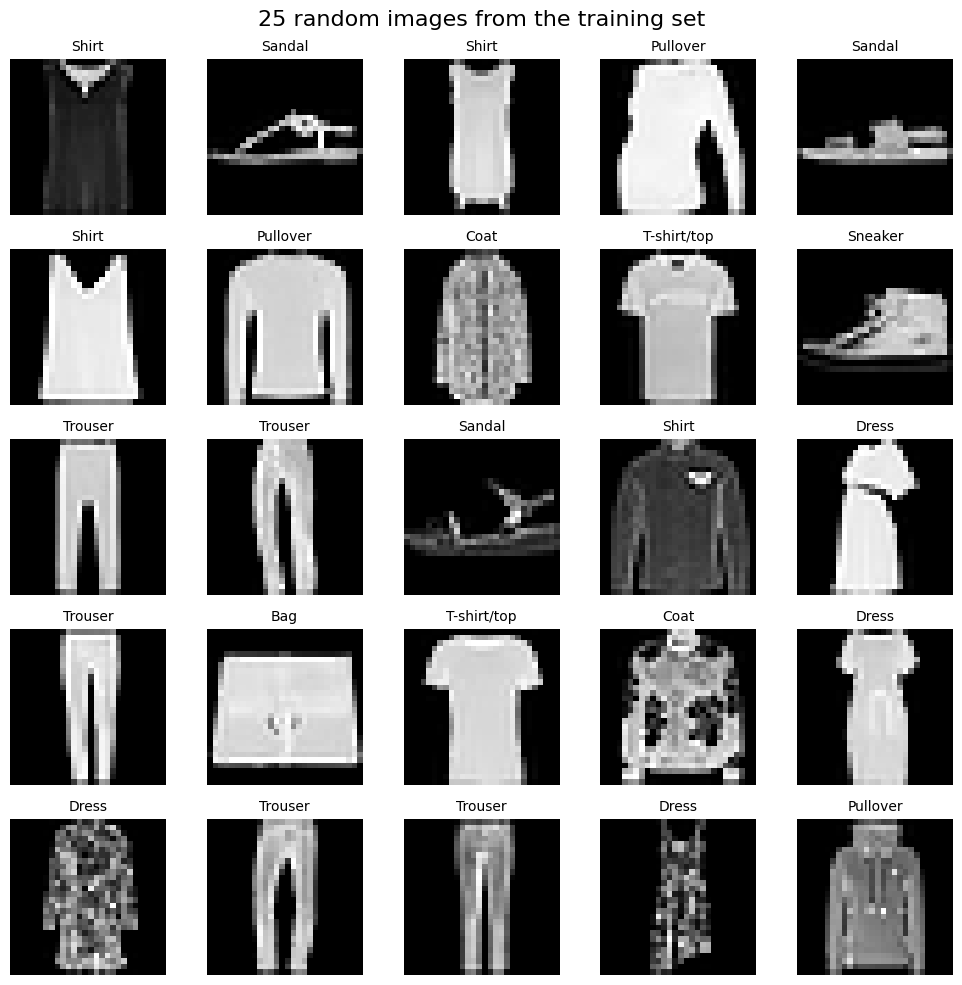

In [19]:
# Function to display 25 random images with labels
def display_random_images(x_data, y_data, labels, num_images=25):
    plt.figure(figsize=(10, 10))

    # Set the main title for the entire plot
    plt.suptitle("25 random images from the training set", fontsize=16)

    # Randomly select indices
    random_indices = np.random.choice(len(x_data), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        plt.subplot(5, 5, i + 1)  # Create a 4x4 grid for 25 images
        # Reshape the image data to 28x28
        image = x_data[idx].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(labels[y_data[idx]], fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display 25 random images from the training set
display_random_images(x_train, y_train, labels)

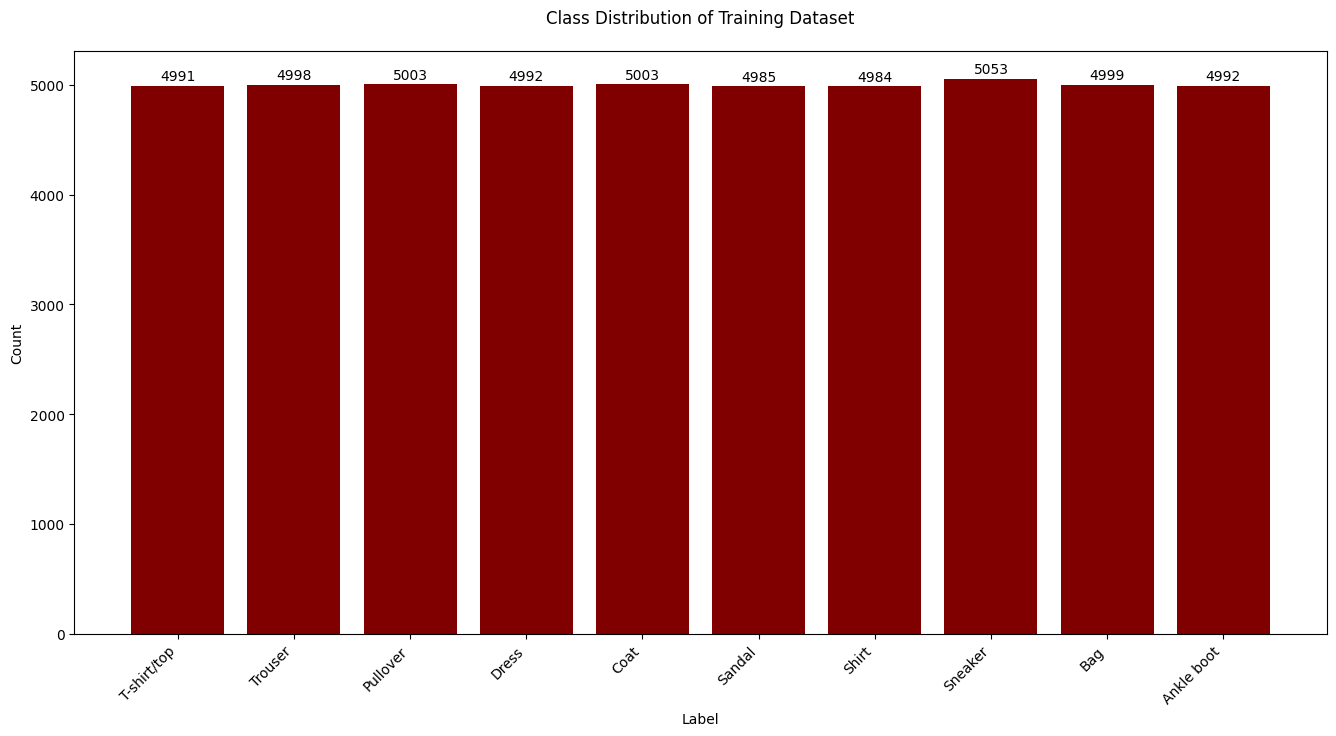

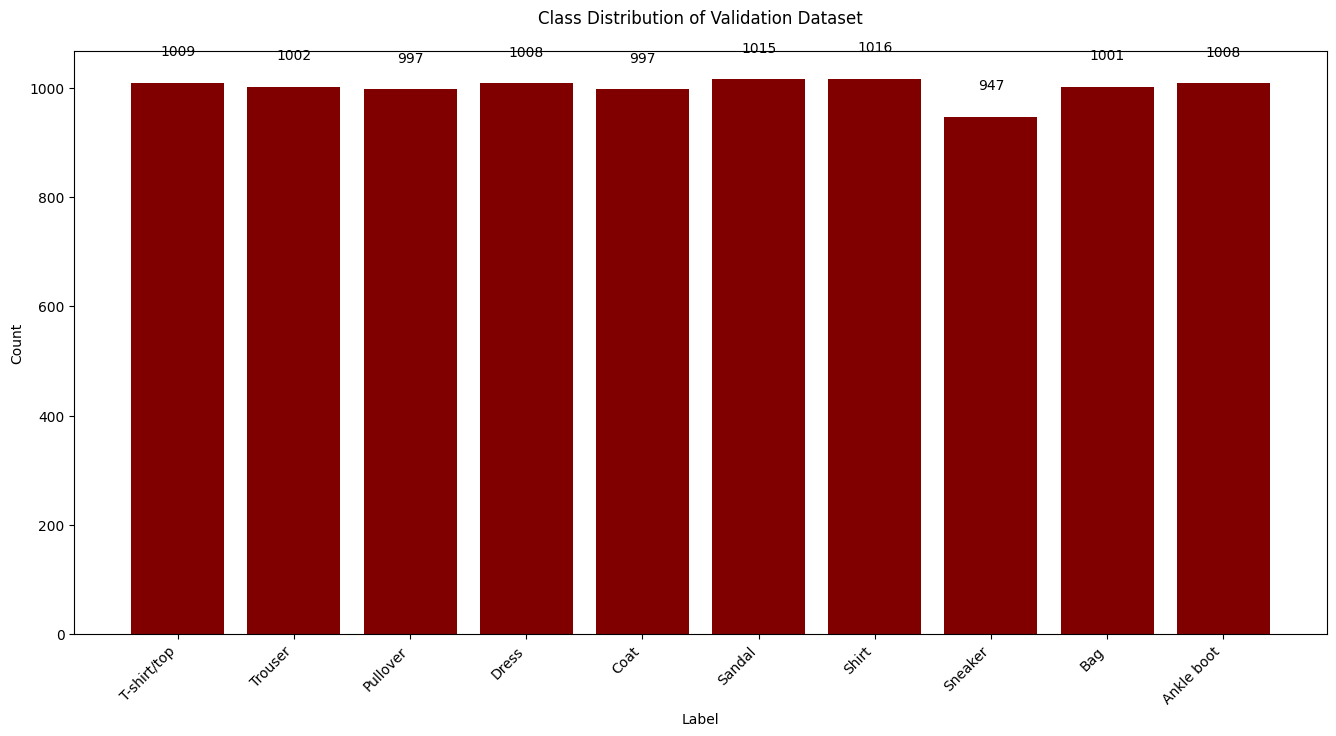

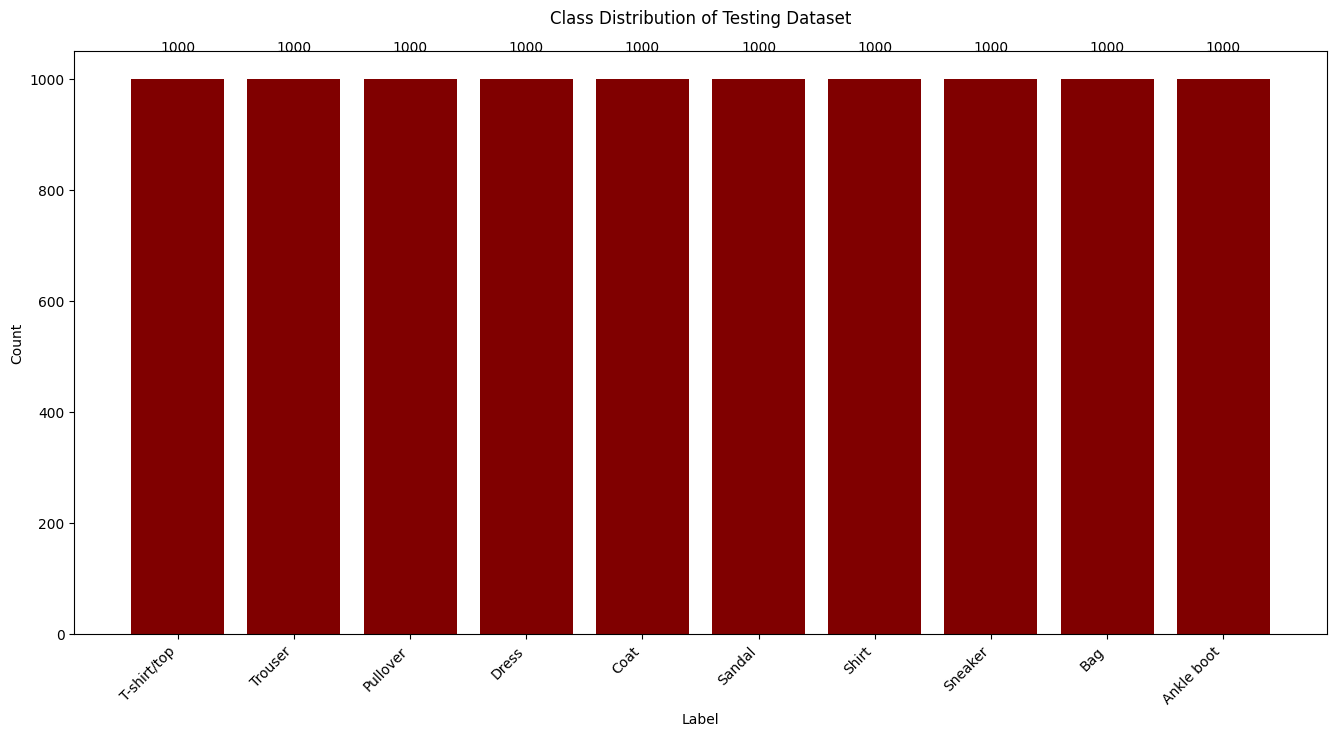

In [20]:
# Computes Class Distributions
# Determines the number of samples in each class for both training, validation and test sets.


# Function to plot class distribution with counts
def plot_class_distribution(dataframe, dataset_name):

    # Computes class distribution
    label_counts = dataframe['label'].value_counts().sort_index()

    # Gets label names for plotting
    label_names = [labels[x] for x in label_counts.index]

    # Plots the distribution
    plt.figure(figsize=(14, 8))
    plt.bar(label_names, label_counts, color='maroon')

    # Adds the counts on top of each bar
    for i, count in enumerate(label_counts):
        plt.text(i, count + 50, str(count), ha='center', fontsize=10)

    # Sets labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Class Distribution of {dataset_name} Dataset', pad=20)
    plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels slightly for better readability
    plt.tight_layout(pad=3)  # Adjusts layout for better spacing
    plt.show()

# Plot the class distributions for train_df, val_df, and test_df
plot_class_distribution(train_df, "Training")
plot_class_distribution(val_df, "Validation")
plot_class_distribution(test_df, "Testing")

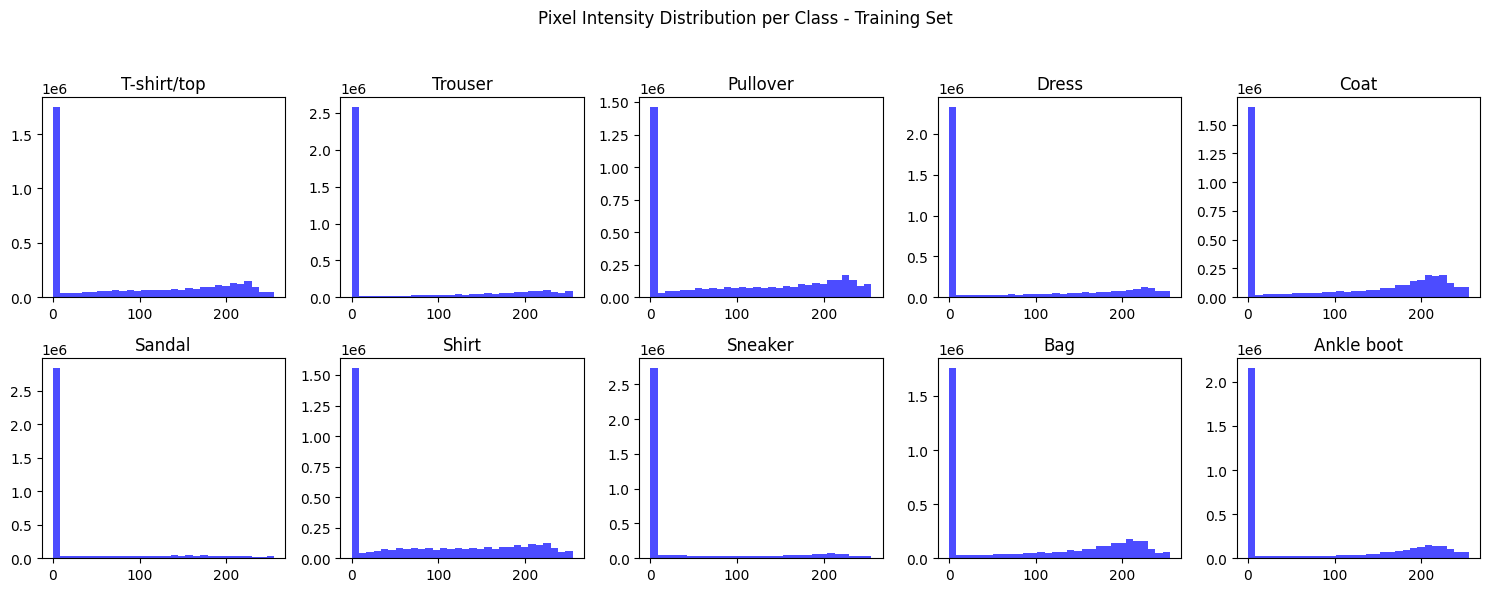

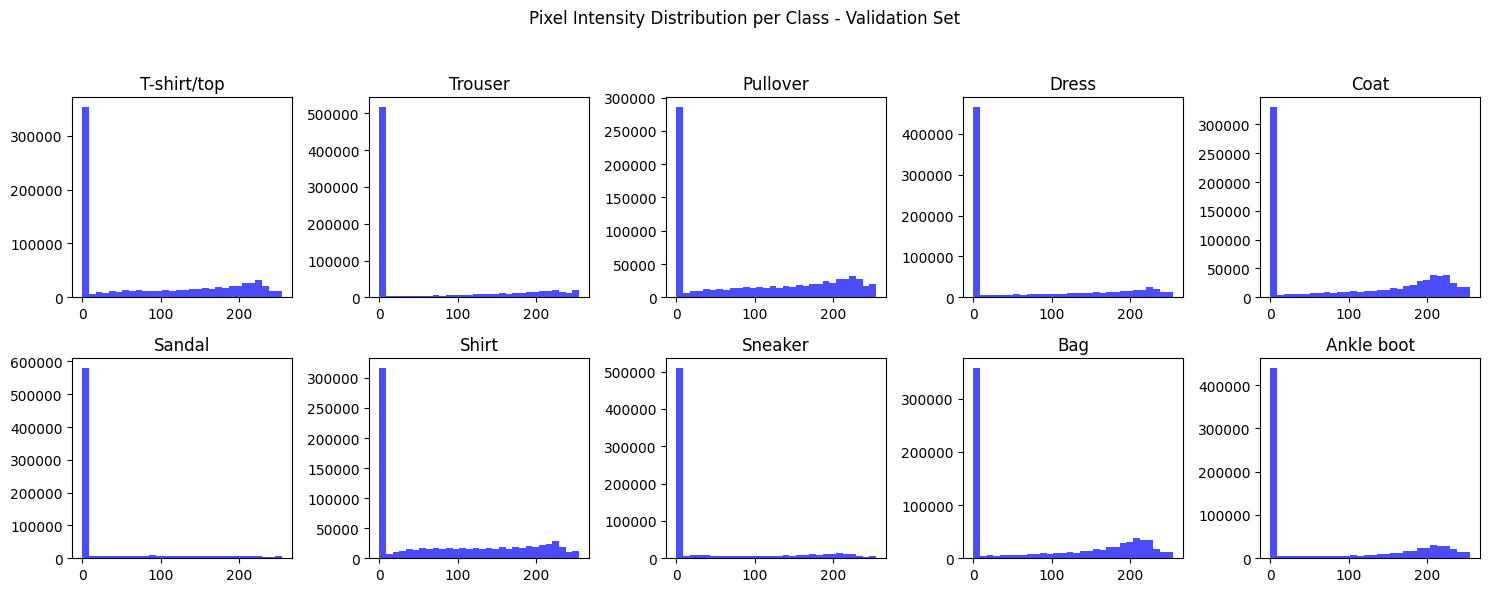

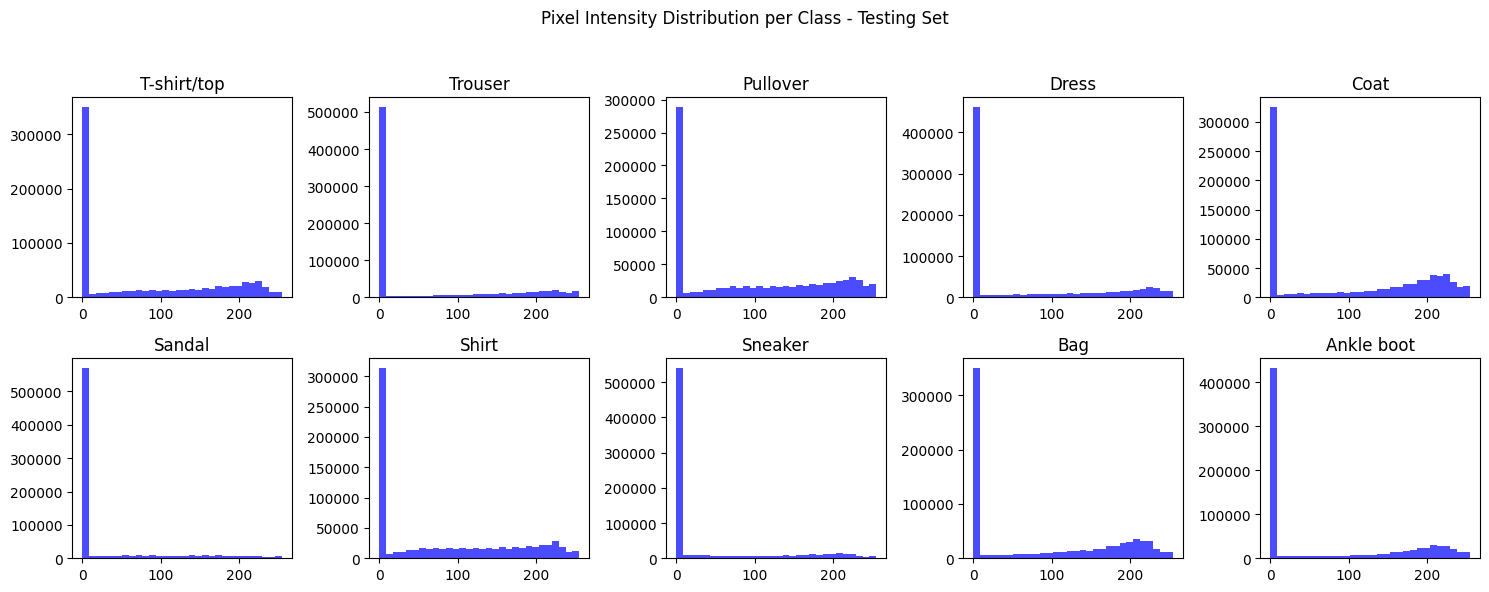

In [21]:
# To analyze the pixel intensity distribution for each class in the training, validation, and test sets.
# By examining the pixel intensities, we can gain insights into the brightness and contrast characteristics of images in each class, which might reveal differences or similarities across categories.

# The pixel distribution can help in preprocessing decisions. If pixel intensity distributions are skewed, normalization or contrast adjustments may be needed to improve model performance.

# Classes with wider or more dispersed distributions may contain more varied images, indicating a higher diversity within that class.
# Narrower distributions suggest more uniformity, which could mean that those classes have visually similar items.


# Function to plot pixel intensity distribution per class for a training, validation, and testing dataset

def plot_pixel_intensity_distribution(x_data, y_data, dataset_name):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for label in range(10):
        # Flatten all images in a particular class
        class_pixels = x_data[y_data == label].flatten()

        # Select the subplot for the current class
        ax = axes[label // 5, label % 5]
        ax.hist(class_pixels, bins=30, color='blue', alpha=0.7)
        ax.set_title(labels[label])

    # Set overall plot title and layout
    plt.suptitle(f'Pixel Intensity Distribution per Class - {dataset_name} Set')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot for training, validation, and testing datasets
plot_pixel_intensity_distribution(x_train, y_train, "Training")
plot_pixel_intensity_distribution(x_val, y_val, "Validation")
plot_pixel_intensity_distribution(x_test, y_test, "Testing")

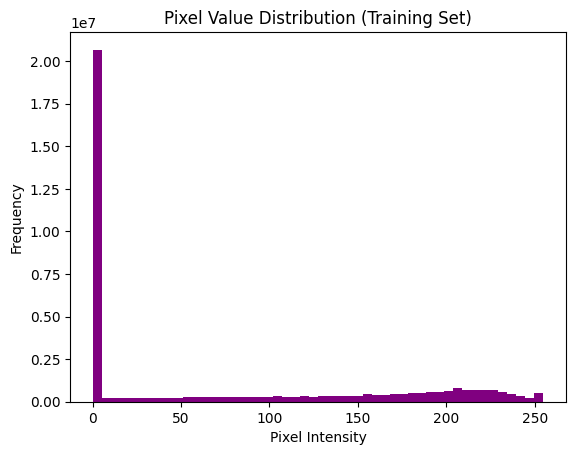

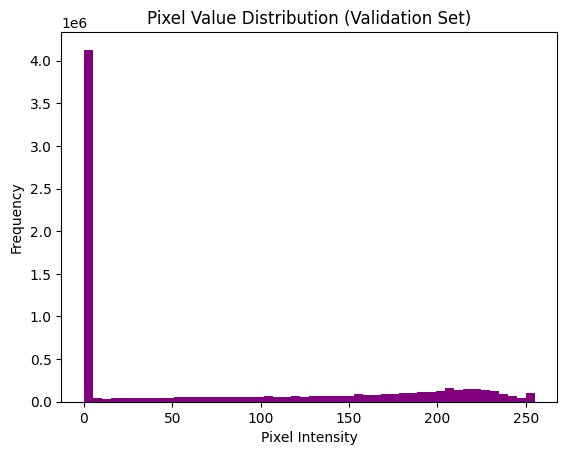

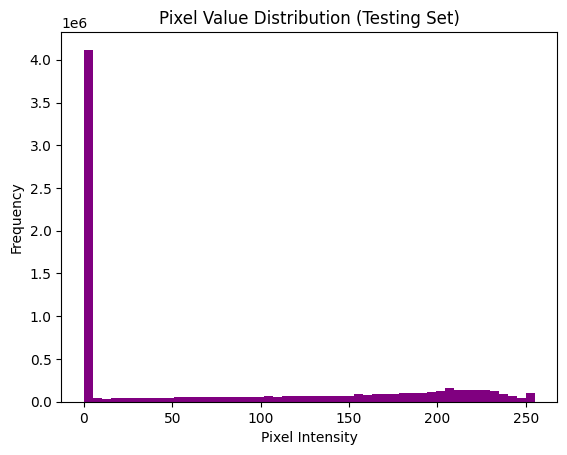

In [22]:
# To examine the overall distribution of pixel intensity values for each dataset (training, validation, and test).
# This helps to understand the brightness and contrast characteristics of images in each split, providing insight into the range and concentration of pixel values.

# Since pixel intensities in grayscale images range from 0 (black) to 255 (white), analyzing this distribution can reveal whether the images are generally darker or lighter,
# and if there are any anomalies.
# If the pixel values are unevenly distributed or concentrated in specific ranges, it may indicate the need for preprocessing techniques such as normalization or contrast adjustment

# Function to plot pixel value distribution for a given dataset
def plot_pixel_value_distribution(x_data, dataset_name):
    # Flatten all images and get pixel intensities
    pixel_values = x_data.flatten()
    plt.hist(pixel_values, bins=50, color='purple')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Pixel Value Distribution ({dataset_name} Set)')
    plt.show()

# Plot pixel value distribution for training, validation, and testing sets
plot_pixel_value_distribution(x_train, "Training")
plot_pixel_value_distribution(x_val, "Validation")
plot_pixel_value_distribution(x_test, "Testing")

Normalization


In [24]:
# Separates labels from features in Traing DataFrame
train_labels = train_df.pop('label')

In [25]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,56,175,0,0
1,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,73,...,64,59,64,61,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,7,...,36,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,...,0,3,0,87,220,214,165,0,0,0


In [26]:
# Separates labels from features in Validation DataFrame
val_labels = val_df.pop('label')
val_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,4,0,29,136,105,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Separates labels from features in Test DataFrame
test_labels = test_df.pop('label')
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


In [28]:
# Creats MinMaxScaler for range normalization
scaler = MinMaxScaler()

# Fits the scaler on the training data
scaler.fit(train_df)

# Transforms the training, validation, and test data
train_normalized = scaler.transform(train_df)
val_normalized = scaler.transform(val_df)
test_normalized = scaler.transform(test_df)

# Converts back to DataFrames
train_normalized_df = pd.DataFrame(train_normalized, index=train_df.index, columns=train_df.columns)
val_normalized_df = pd.DataFrame(val_normalized, index=val_df.index, columns=val_df.columns)
test_normalized_df = pd.DataFrame(test_normalized, index=test_df.index, columns=test_df.columns)



In [29]:
# Displays a few rows from normalized Training DataFrame to confirm
print("Normalized Training Set:")
print(train_normalized_df.head())

Normalized Training Set:
   0    1    2    3    4    5    6        7    8         9    ...       774  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.000000  ...  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.015686  ...  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.286275  ...  0.250980   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.027451  ...  0.141176   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00905  0.0  0.000000  ...  0.000000   

        775      776       777       778       779       780       781  782  \
0  0.000000  0.00000  0.000000  0.007843  0.000000  0.219608  0.686275  0.0   
1  0.000000  0.00000  0.000000  0.003922  0.000000  0.000000  0.000000  0.0   
2  0.231373  0.25098  0.239216  0.000000  0.000000  0.000000  0.000000  0.0   
3  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
4  0.011765  0.00000  0.341176  0.862745  0.839216  0.647059  0.000000  0.0   

   783  
0  0.0  
1  0.0 

In [30]:
# Displays a few rows from normalized Validation DataFrame to confirm
print("Normalized Validation Set:")
print(val_normalized_df.head())

Normalized Validation Set:
   0    1    2    3    4    5    6         7    8         9    ...       774  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...  0.000000   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.004525  0.0  0.003922  ...  0.015686   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...  0.000000   

   775       776       777       778  779  780  781  782  783  
0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.113725  0.533333  0.411765  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


In [31]:
# Displays a few rows from normalized Test DataFrame to confirm
print("Normalized Test Set:")
print(test_normalized_df.head())

Normalized Test Set:
   0    1    2         3    4         5         6    7         8         9    \
0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000   
1  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000   
2  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.003937  0.000000   
3  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.082353   
4  0.0  0.0  0.0  0.012195  0.0  0.004348  0.004525  0.0  0.000000  0.000000   

   ...       774       775  776       777       778       779       780  781  \
0  ...  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
1  ...  0.007843  0.011765  0.0  0.011765  0.682353  0.741176  0.262745  0.0   
2  ...  0.643137  0.227451  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
3  ...  0.003922  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
4  ...  0.278431  0.047059  0.0  0.000000  0.000000  0.000000  0.000000  0.0   

   782  783  
0  

Principal Componenet Analysis

Elbow point at 90.0% explained variance: 84 components


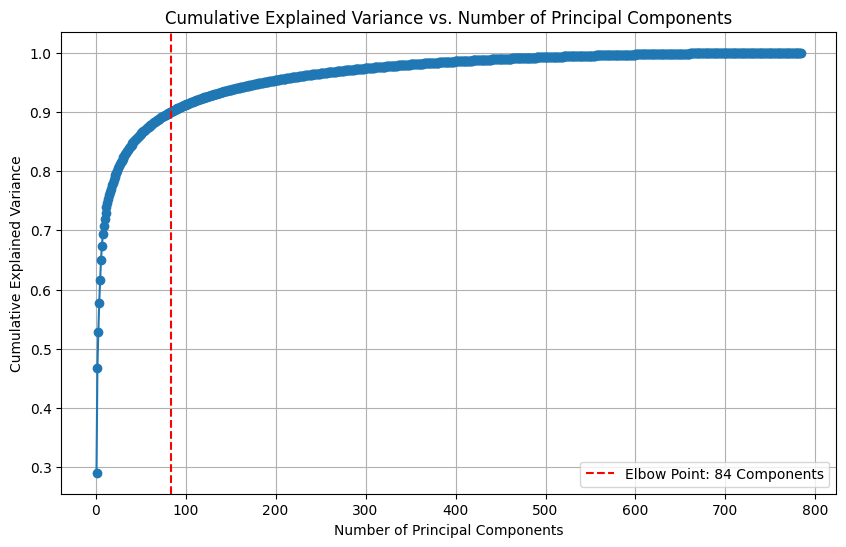

In [33]:
# Performs PCA on the normalized training data
pca = PCA()
pca.fit(train_normalized_df.values)

# Calculates the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Finds the number of components where cumulative explained variance surpasses 90%
threshold = 0.90  # You can adjust this threshold to 95% or any other value
elbow_point = next(i for i, total_variance in enumerate(cumulative_explained_variance) if total_variance >= threshold)

print(f"Elbow point at {threshold*100}% explained variance: {elbow_point + 1} components")

# Plots the cumulative explained variance with the elbow point highlighted
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')

# Highlights the elbow point
plt.axvline(x=elbow_point + 1, color='r', linestyle='--', label=f'Elbow Point: {elbow_point + 1} Components')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#Principal componenet analysis with 84 principal componenets

pca = PCA(n_components=84)
train_pca = pca.fit_transform(train_normalized_df.values)

print('Explained variation for principal components: {}'.format(pca.explained_variance_ratio_))

Explained variation for principal components: [0.29067856 0.17698287 0.0601723  0.04975581 0.03843853 0.03459534
 0.02329397 0.01914372 0.01356268 0.01319435 0.00991079 0.009132
 0.00768329 0.00656573 0.00611991 0.00592702 0.00550004 0.00524628
 0.00459874 0.00454316 0.0043124  0.0040634  0.00386025 0.00371959
 0.00362387 0.00350598 0.00332976 0.0031836  0.00307412 0.00290772
 0.00275654 0.00265257 0.00263332 0.00255285 0.00246565 0.00236022
 0.0023049  0.00224677 0.00218125 0.00209423 0.0019965  0.00195378
 0.00194345 0.00183636 0.00174535 0.00171402 0.00169041 0.00163347
 0.00161024 0.00155058 0.00151768 0.00149854 0.00146676 0.00143074
 0.0013846  0.00137103 0.00130497 0.00128921 0.00127209 0.00125276
 0.00121842 0.0012033  0.00117991 0.00116859 0.00114867 0.00112461
 0.00111083 0.00109502 0.00105288 0.0010495  0.00103181 0.00101085
 0.00098072 0.0009599  0.0009388  0.00093172 0.00092446 0.00090495
 0.00089479 0.00087295 0.00085857 0.00084324 0.00082946 0.0008159 ]


In [35]:
val_pca = pca.transform(val_normalized_df.values)
test_pca = pca.transform(test_normalized_df.values)

# Convert these to DataFrames for easy handling and examination
train_pca_df = pd.DataFrame(train_pca, index=train_normalized_df.index)
val_pca_df = pd.DataFrame(val_pca, index=val_normalized_df.index)
test_pca_df = pd.DataFrame(test_pca, index=test_normalized_df.index)

# Display the transformed data to confirm
print("Transformed Training Set with PCA (first few rows):")
print(train_pca_df.head())
print("\nTransformed Validation Set with PCA (first few rows):")
print(val_pca_df.head())
print("\nTransformed Test Set with PCA (first few rows):")
print(test_pca_df.head())

Transformed Training Set with PCA (first few rows):
         0         1         2         3         4         5         6   \
0 -5.663608 -1.258581  0.263414  3.334566 -0.891758  0.126361  0.575920   
1  7.248917 -2.868448 -1.364093 -0.325285 -1.447542  3.933855 -0.039266   
2 -3.834562 -3.044403  1.800336  2.382241 -0.535764  1.536483 -0.614166   
3  0.437235 -6.156388 -1.804529 -0.945502 -1.624369 -1.917604  1.382633   
4  5.330700  3.457840  2.819891 -2.133765 -4.306016  0.238359  0.731534   

         7         8         9   ...        74        75        76        77  \
0  0.432474 -0.744810  0.838977  ...  0.114027 -0.202811 -0.653379  0.128485   
1  0.691922 -0.254652 -1.642442  ... -0.267616  0.455779  0.290321 -0.353117   
2 -0.467807  0.104483  0.071877  ...  0.002715 -0.196645 -0.162990  0.072198   
3 -0.128182  0.650216 -0.029631  ...  0.275974 -0.089660 -0.361290  0.077581   
4  0.726114  1.151351 -1.806564  ... -0.411397  0.180144  0.062912 -0.190846   

         78     

In [36]:
pca.components_.shape

(84, 784)

 From the above, we can see that the first 3 components can retain 52.78% of variance, with the 1st component retaining maximum variance of 29.06 %, followed by components at 17.7% and 6.02% respectively.

Text(0.5, 0.98, '3-Component PCA')

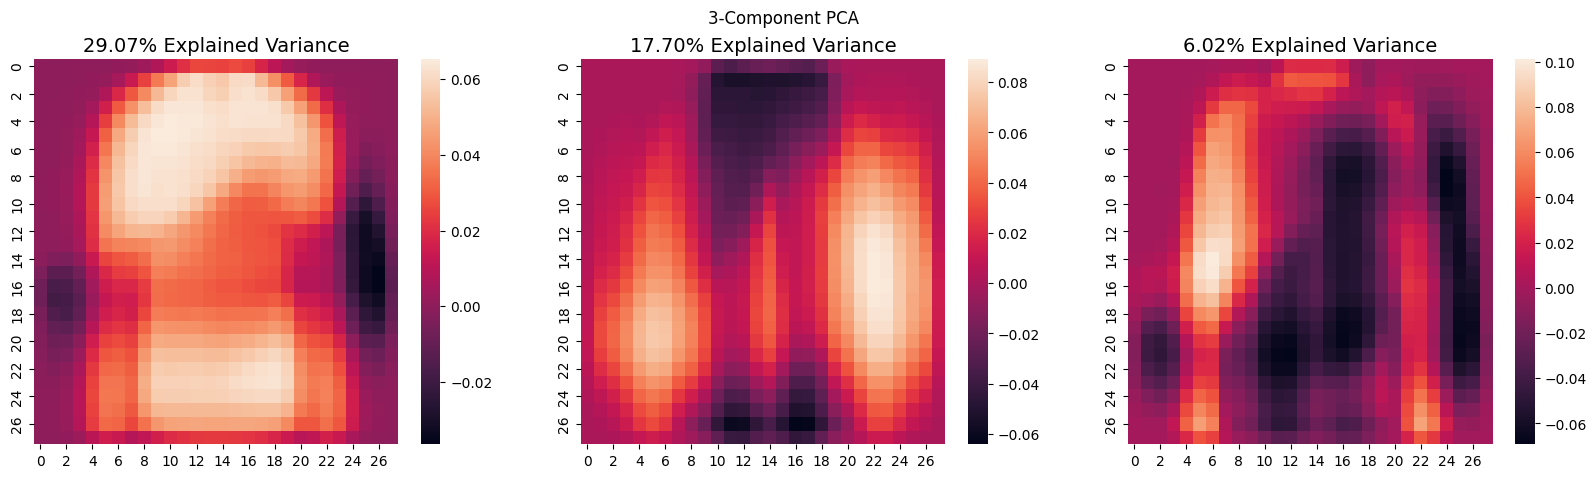

In [38]:
# Creates a figure with 1 row and 3 columns of subplots, and set the figure size

fig, axarr = plt.subplots(1, 3, figsize=(20, 5))


# Plot the first principal component as a heatmap in the first subplot
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0])

# Plot the second principal component as a heatmap in the second subplot
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1])

# Plot the third principal component as a heatmap in the third subplot
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2])


axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)

axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)

axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)

plt.suptitle('3-Component PCA')

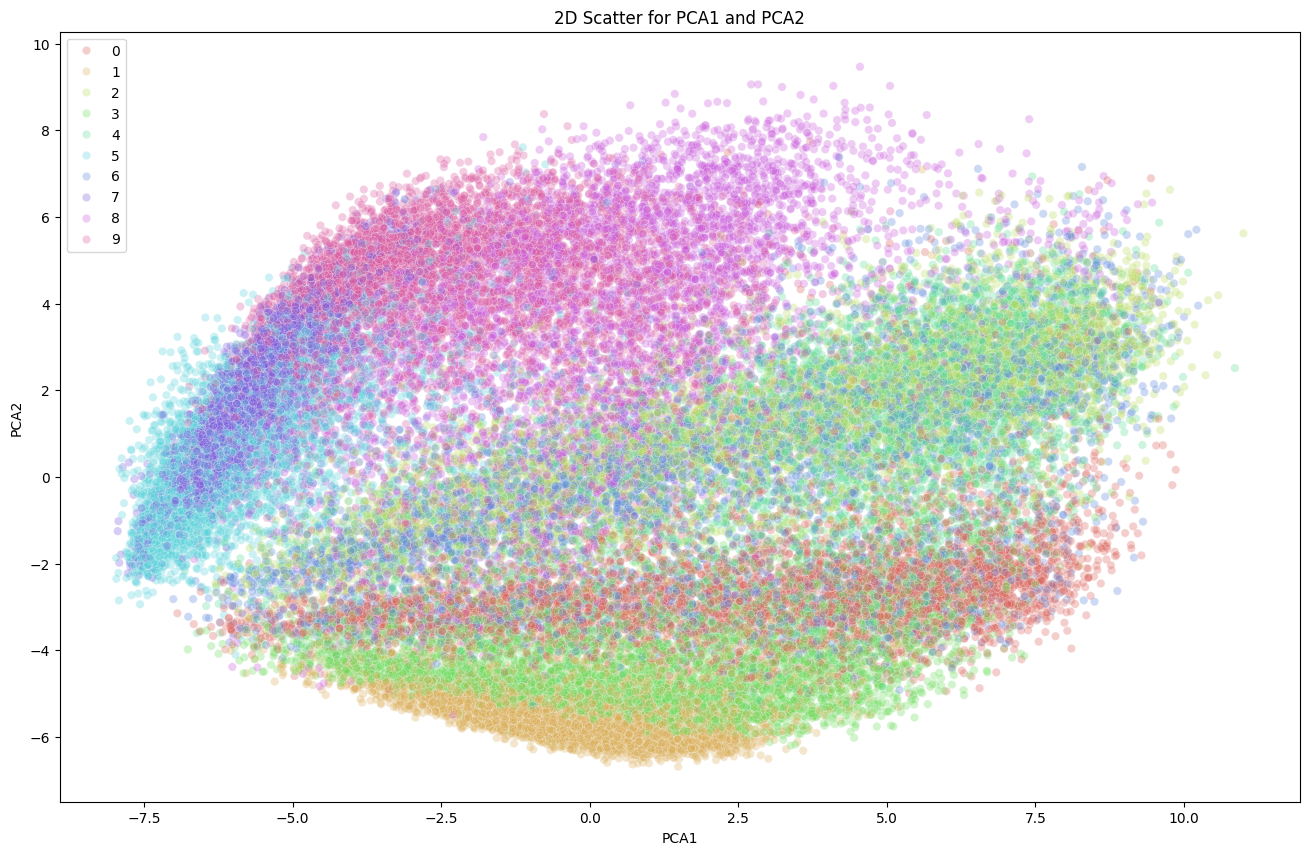

In [39]:
#2D Scatter from PCA

plt.figure(figsize=(16,10))

sns.scatterplot(
    x = train_pca[:, 0],
    y = train_pca[:, 1],
    hue = train_labels.values,
    hue_order = labels,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D Scatter for PCA1 and PCA2')
plt.show()

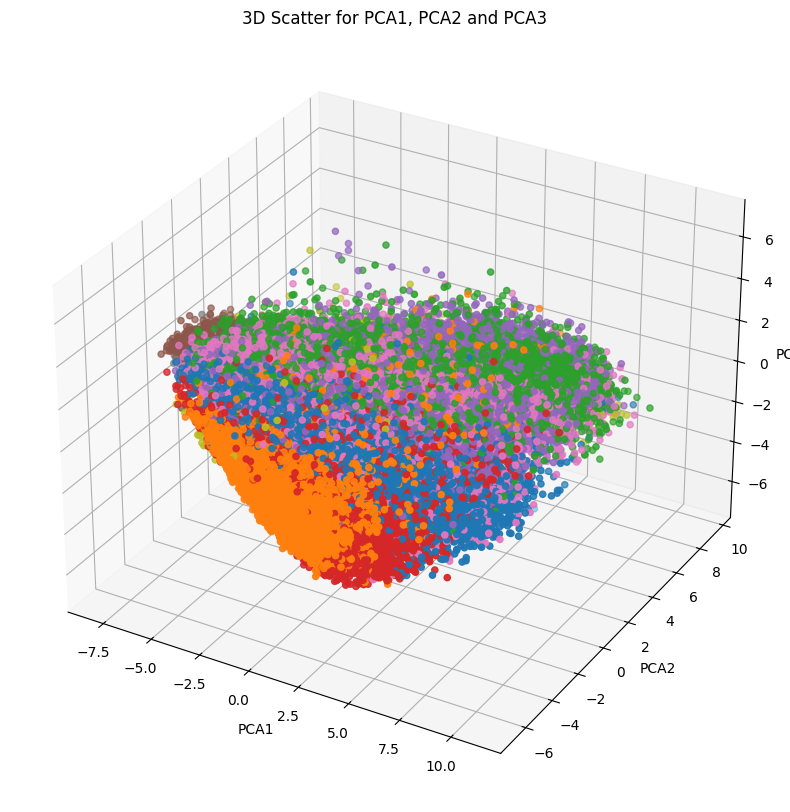

In [40]:
#3D Scatter from PCA
fig = plt.figure(figsize=(16,10))
graph = fig.add_subplot(111, projection = '3d')
graph.scatter(
    xs = train_pca[:, 0],
    ys = train_pca[:, 1],
    zs = train_pca[:, 2],
    c = train_labels.values,
    cmap='tab10'
)
graph.set_xlabel('PCA1')
graph.set_ylabel('PCA2')
graph.set_zlabel('PCA3')
graph.title.set_text("3D Scatter for PCA1, PCA2 and PCA3")
plt.show()

In [41]:
# Add the label column back to the PCA-transformed DataFrames
train_pca_df['label'] = train_labels.values
val_pca_df['label'] = val_labels.values
test_pca_df['label'] = test_labels.values

# Display the transformed training set to confirm
print("Transformed Training Set with Labels:")
print(train_pca_df.head())
# Display the transformed Validation set to confirm
print("Transformed Validation Set with Labels:")
print(val_pca_df.head())
# Display the transformed Testing set to confirm
print("Transformed Training Set with Labels:")
print(test_pca_df.head())

Transformed Training Set with Labels:
          0         1         2         3         4         5         6  \
0 -5.663608 -1.258581  0.263414  3.334566 -0.891758  0.126361  0.575920   
1  7.248917 -2.868448 -1.364093 -0.325285 -1.447542  3.933855 -0.039266   
2 -3.834562 -3.044403  1.800336  2.382241 -0.535764  1.536483 -0.614166   
3  0.437235 -6.156388 -1.804529 -0.945502 -1.624369 -1.917604  1.382633   
4  5.330700  3.457840  2.819891 -2.133765 -4.306016  0.238359  0.731534   

          7         8         9  ...        75        76        77        78  \
0  0.432474 -0.744810  0.838977  ... -0.202811 -0.653379  0.128485 -0.127678   
1  0.691922 -0.254652 -1.642442  ...  0.455779  0.290321 -0.353117 -0.071229   
2 -0.467807  0.104483  0.071877  ... -0.196645 -0.162990  0.072198 -0.044745   
3 -0.128182  0.650216 -0.029631  ... -0.089660 -0.361290  0.077581  0.201540   
4  0.726114  1.151351 -1.806564  ...  0.180144  0.062912 -0.190846  0.140975   

         79        80        8

 k-nearest neighbors (KNN)


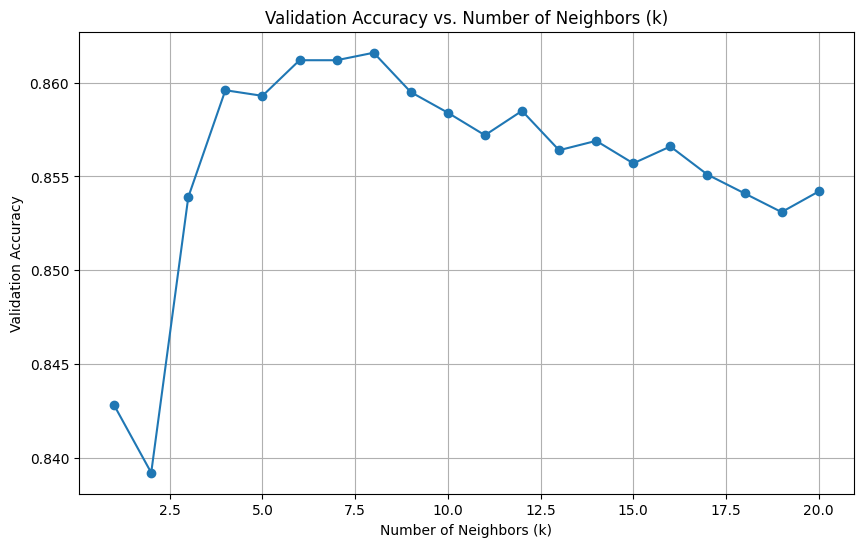

The optimal number of neighbors is 8 with accuracy 0.86


In [43]:
# Assuming train_pca_df and val_pca_df contain the features and labels
# Separate features and labels
X_train = train_pca_df.drop(columns=['label'])
y_train = train_pca_df['label']
X_val = val_pca_df.drop(columns=['label'])
y_val = val_pca_df['label']

# List to store the accuracy for each k value
k_values = range(1, 21)  # You can adjust the range as needed
accuracies = []

# Loop over different values of k
for k in k_values:
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    # Predict on the validation set
    y_pred = knn.predict(X_val)
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

# Find the optimal k with the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"The optimal number of neighbors is {optimal_k} with accuracy {max(accuracies):.2f}")

In [44]:
# Define the KNN classifier with k = 8
knn = KNeighborsClassifier(n_neighbors=8)

# Separate features and labels from the test set
X_test = test_pca_df.drop(columns=['label'])
y_test = test_pca_df['label']

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_test_pred = knn.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with k=8: {test_accuracy:.2f}")

Test Accuracy with k=8: 0.86


In [45]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Cross-Validation KNN Accuracy Score: 0.86
Cross-Validation KNN Precision Score: 0.86
Cross-Validation KNN Recall Score: 0.86
Cross-Validation KNN F1 Score: 0.86


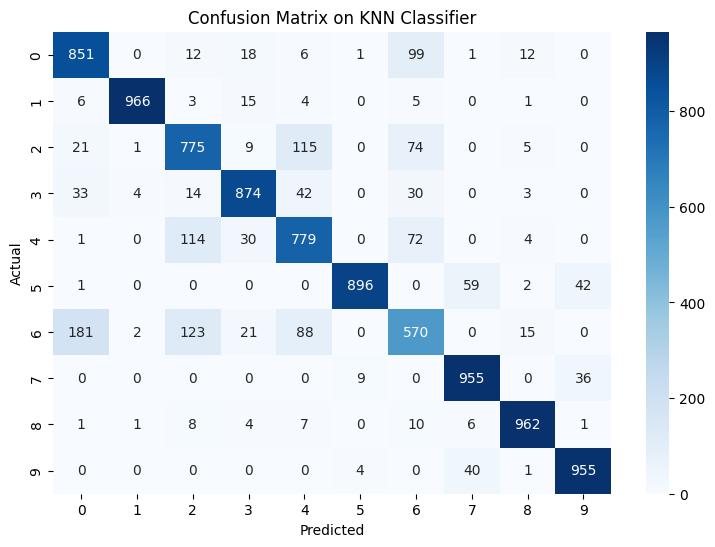

KNN Test Accuracy: 0.86
KNN Test Precision: 0.86
KNN Test Recall: 0.86
KNN Test F1 Score: 0.86


In [46]:
# Initialize KNN with the optimal number of neighbors
optimal_k = 8
knn = KNeighborsClassifier(n_neighbors=optimal_k)


# Perform cross-validation to calculate accuracy, precision, recall, and F1-score
knn_accuracy = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='accuracy')
knn_precision = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='precision_micro')
knn_recall = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='recall_micro')
knn_f1 = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='f1_micro')

# Print cross-validated metrics
print(f"Cross-Validation KNN Accuracy Score: {knn_accuracy.mean():.2f}")
print(f"Cross-Validation KNN Precision Score: {knn_precision.mean():.2f}")
print(f"Cross-Validation KNN Recall Score: {knn_recall.mean():.2f}")
print(f"Cross-Validation KNN F1 Score: {knn_f1.mean():.2f}")

# Fit the KNN model on the training set and predict on the test set
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate the confusion matrix for the test set predictions
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix on KNN Classifier")
sns.heatmap(conf_matrix_knn, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate accuracy, precision, recall, and F1-score on the test set
test_accuracy = accuracy_score(y_test, y_pred_knn)
test_precision = precision_score(y_test, y_pred_knn, average='micro')
test_recall = recall_score(y_test, y_pred_knn, average='micro')
test_f1 = f1_score(y_test, y_pred_knn, average='micro')

# Print the test set metrics
print(f"KNN Test Accuracy: {test_accuracy:.2f}")
print(f"KNN Test Precision: {test_precision:.2f}")
print(f"KNN Test Recall: {test_recall:.2f}")
print(f"KNN Test F1 Score: {test_f1:.2f}")

Logistic Regression

Validation Accuracy for Logistic Regression: 0.84
Validation Precision for Logistic Regression: 0.84
Validation Recall Logistic Regression: 0.84
Validation F1 Score Logistic Regression: 0.84


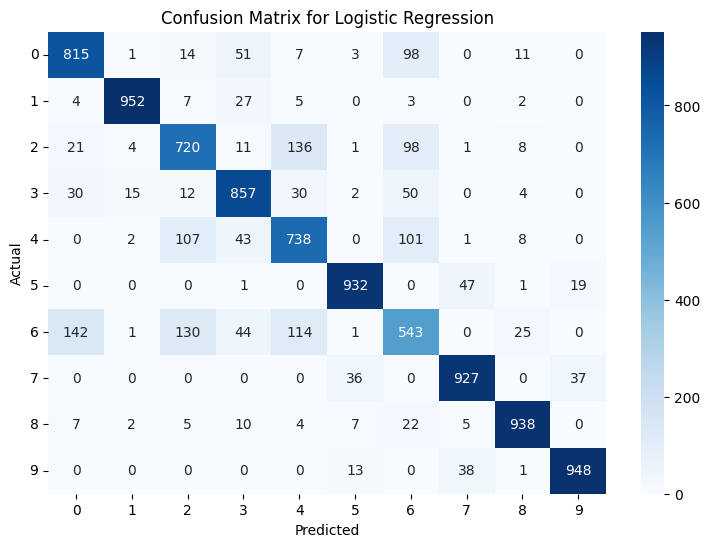

Test Accuracy for Logistic Regression: 0.84
Test Precision for Logistic Regression: 0.84
Test Recall for Logistic Regression: 0.84
Test F1 Score for Logistic Regression: 0.84


In [48]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=0)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Predict on the test data
y_test_pred = log_reg.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)


# Precision (weighted to handle class imbalance)
val_precision = precision_score(y_val, y_val_pred, average="weighted")
test_precision = precision_score(y_test, y_test_pred, average="weighted")

# Recall (weighted to handle class imbalance)
val_recall = recall_score(y_val, y_val_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")

# F1 Score (weighted to handle class imbalance)
val_f1 = f1_score(y_val, y_val_pred, average="weighted")
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print results
print(f"Validation Accuracy for Logistic Regression: {accuracy:.2f}")
print(f"Validation Precision for Logistic Regression: {val_precision:.2f}")
print(f"Validation Recall Logistic Regression: {val_recall:.2f}")
print(f"Validation F1 Score Logistic Regression: {val_f1:.2f}")

# Compute confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix_log_reg, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.yticks(rotation=360)
plt.ylabel("Actual")
plt.show()

print(f"Test Accuracy for Logistic Regression: {test_accuracy:.2f}")
print(f"Test Precision for Logistic Regression: {test_precision:.2f}")
print(f"Test Recall for Logistic Regression: {test_recall:.2f}")
print(f"Test F1 Score for Logistic Regression: {test_f1:.2f}")


SVM:

In [50]:
# SVM
X_train = train_pca_df.drop(columns=['label'])
y_train = train_pca_df['label']
X_val = val_pca_df.drop(columns=['label'])
y_val = val_pca_df['label']

# Define parameter options
kernel_options = ['rbf', 'poly']
C_values = [0.1, 1, 10]

# Lists to store results
results = []

# Loop over different values of kernel and C
for kernel in kernel_options:
    for C in C_values:
        # Initialize and train the SVC model with the current parameters
        svc_clf = SVC(C=C, kernel=kernel)
        svc_clf.fit(X_train, y_train)

        # Predict on the validation set
        y_val_pred = svc_clf.predict(X_val)

        # Calculate accuracy
        acc = accuracy_score(y_val, y_val_pred)

        # Store results (kernel, C, accuracy)
        results.append((kernel, C, acc))

# Print all results
print("Results:")
for kernel, C, acc in results:
    print(f"Kernel: {kernel}, C: {C}, Accuracy: {acc:.3f}")

# Find the best parameters
best_result = max(results, key=lambda x: x[2])
best_kernel, best_C, best_accuracy = best_result

# Print the best parameters
print(f"Best kernel: {best_kernel}, Best C: {best_C}, Accuracy: {best_accuracy:.2f}")

Results:
Kernel: rbf, C: 0.1, Accuracy: 0.853
Kernel: rbf, C: 1, Accuracy: 0.890
Kernel: rbf, C: 10, Accuracy: 0.898
Kernel: poly, C: 0.1, Accuracy: 0.830
Kernel: poly, C: 1, Accuracy: 0.879
Kernel: poly, C: 10, Accuracy: 0.896
Best kernel: rbf, Best C: 10, Accuracy: 0.90


In [51]:
# Initialize the SVM classifier
svm_rbf = SVC(kernel='rbf', C=10, random_state=0, probability=True)

X_test = test_pca_df.drop(columns=['label'])
y_test = test_pca_df['label']

# Train the model on the training data
svm_rbf.fit(X_train, y_train)

SVC(C=10, probability=True, random_state=0)

In [52]:
# Training accuracy
y_train_pred = svm_rbf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Testing accuracy
y_test_pred = svm_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")

# Classification report for testing data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.95374
Testing Accuracy: 0.8957

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.70      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



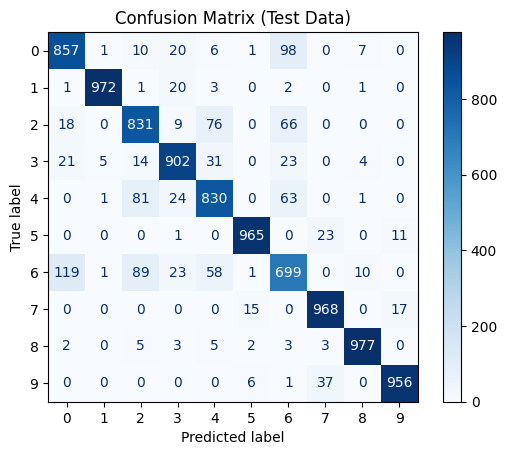

In [53]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
plt.title("Confusion Matrix (Test Data)")
plt.show()

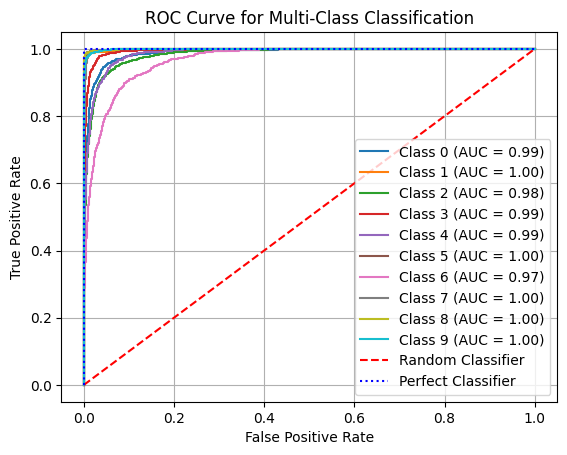

In [54]:
# Binarize the output (one-hot encoding for multi-class)
n_classes = 10
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_proba = svm_rbf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")

# Plot perfect classifier point
plt.plot([0, 0, 1], [0, 1, 1], 'b:', label="Perfect Classifier")

# Labels, legend, and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

CNN(single layer):

Epoch [1/10], Loss: 0.4549, Accuracy: 83.96%
Epoch [2/10], Loss: 0.2942, Accuracy: 89.47%
Epoch [3/10], Loss: 0.2475, Accuracy: 91.03%
Epoch [4/10], Loss: 0.2183, Accuracy: 92.00%
Epoch [5/10], Loss: 0.1922, Accuracy: 92.95%
Epoch [6/10], Loss: 0.1705, Accuracy: 93.74%
Epoch [7/10], Loss: 0.1523, Accuracy: 94.49%
Epoch [8/10], Loss: 0.1342, Accuracy: 95.02%
Epoch [9/10], Loss: 0.1159, Accuracy: 95.86%
Epoch [10/10], Loss: 0.1003, Accuracy: 96.38%


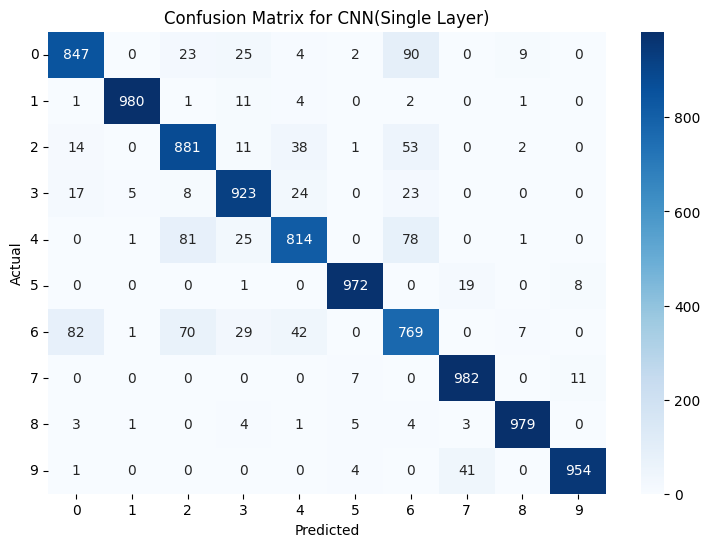

Test Accuracy: 91.01%
Test Precision: 0.9108
Test Recall: 0.9101
Test F1 Score: 0.9101


In [56]:
# achieve the same CNN model and training process for the MNIST dataset using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Load the CSV data
train_df = pd.read_csv('fashion_mnist_train.csv')
val_df = pd.read_csv('fashion_mnist_val.csv')
test_df = pd.read_csv('fashion_mnist_test.csv')

# Separate features and labels
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
x_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values
x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 14 * 14)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


# Evaluate the model on the test data
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to arrays for evaluation
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Compute confusion matrix for Logistic Regression
conf_matrix_CNN = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix for CNN(Single Layer)")
sns.heatmap(conf_matrix_CNN, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.yticks(rotation=360)
plt.ylabel("Actual")
plt.show()

# Calculate metrics
test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision = precision_score(all_labels, all_predictions, average="weighted")
test_recall = recall_score(all_labels, all_predictions, average="weighted")
test_f1 = f1_score(all_labels, all_predictions, average="weighted")

# Print metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


CNN(Double layer):



Epoch 1/10, Train Loss: 0.4888, Val Loss: 0.3504
Epoch 2/10, Train Loss: 0.3172, Val Loss: 0.3099
Epoch 3/10, Train Loss: 0.2658, Val Loss: 0.2926
Epoch 4/10, Train Loss: 0.2338, Val Loss: 0.2518
Epoch 5/10, Train Loss: 0.2105, Val Loss: 0.2463
Epoch 6/10, Train Loss: 0.1896, Val Loss: 0.2325
Epoch 7/10, Train Loss: 0.1700, Val Loss: 0.2292
Epoch 8/10, Train Loss: 0.1518, Val Loss: 0.2360
Epoch 9/10, Train Loss: 0.1353, Val Loss: 0.2335
Epoch 10/10, Train Loss: 0.1188, Val Loss: 0.2453


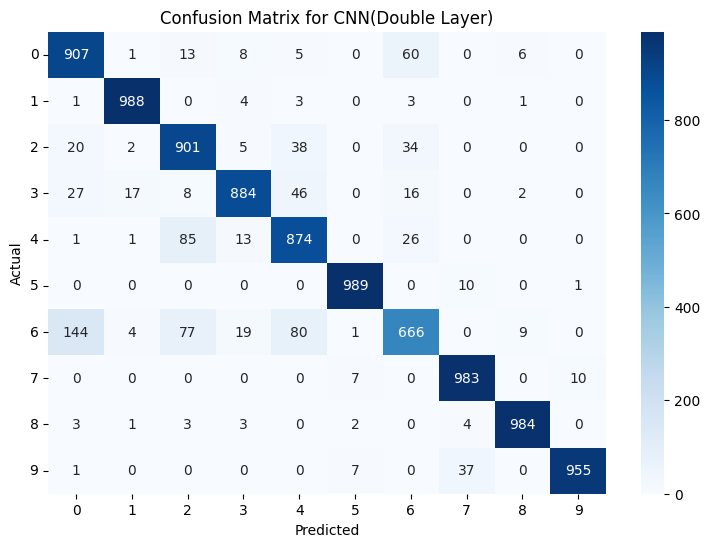

Test Accuracy: 91.31%
Test Precision: 0.9137
Test Recall: 0.9131
Test F1 Score: 0.9119


In [58]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

# Load the CSV data
train_df = pd.read_csv('fashion_mnist_train.csv')
val_df = pd.read_csv('fashion_mnist_val.csv')
test_df = pd.read_csv('fashion_mnist_test.csv')

# Separate features and labels
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
x_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values
x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate output size: (input_size / 2^num_pools)
        # Fashion-MNIST input is (28x28), 2 pooling layers -> 28 / 2 / 2 = 7
        # 64 channels, 7x7 size after pooling
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Output for 10 classes
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Evaluate the model on the test data
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to arrays for evaluation
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Compute confusion matrix for Logistic Regression
conf_matrix_CNN = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix for CNN(Double Layer)")
sns.heatmap(conf_matrix_CNN, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.yticks(rotation=360)
plt.ylabel("Actual")
plt.show()

# Calculate metrics
test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision = precision_score(all_labels, all_predictions, average="weighted")
test_recall = recall_score(all_labels, all_predictions, average="weighted")
test_f1 = f1_score(all_labels, all_predictions, average="weighted")

# Print metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")



CNN (with 3 layers):

Epoch 1/10, Train Loss: 0.5905, Val Loss: 0.3915
Epoch 2/10, Train Loss: 0.3370, Val Loss: 0.3070
Epoch 3/10, Train Loss: 0.2781, Val Loss: 0.2744
Epoch 4/10, Train Loss: 0.2443, Val Loss: 0.2458
Epoch 5/10, Train Loss: 0.2130, Val Loss: 0.2576
Epoch 6/10, Train Loss: 0.1948, Val Loss: 0.2379
Epoch 7/10, Train Loss: 0.1750, Val Loss: 0.2372
Epoch 8/10, Train Loss: 0.1575, Val Loss: 0.2312
Epoch 9/10, Train Loss: 0.1389, Val Loss: 0.2652
Epoch 10/10, Train Loss: 0.1264, Val Loss: 0.2452


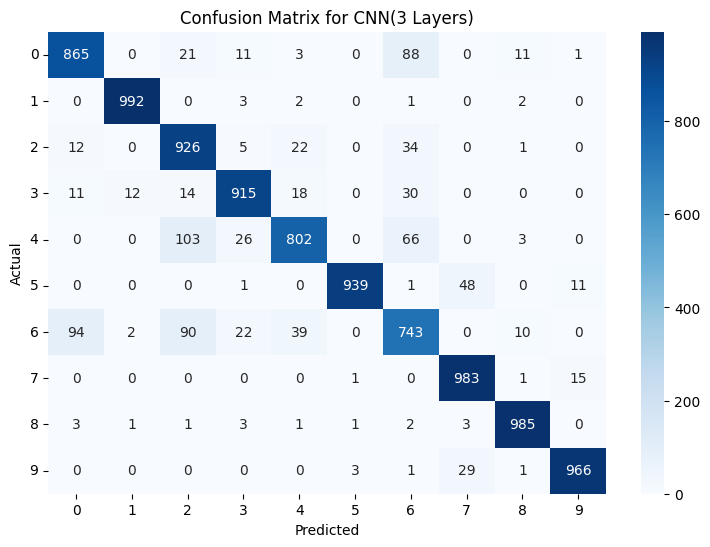

Test Accuracy: 91.16%
Precision: 0.9130
Recall: 0.9116
F1 Score: 0.9113


In [60]:
# Load the CSV data
train_df = pd.read_csv('fashion_mnist_train.csv')
val_df = pd.read_csv('fashion_mnist_val.csv')
test_df = pd.read_csv('fashion_mnist_test.csv')

# Separate features and labels
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
x_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values
x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 1 input channel -> 32 output channels
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # 32 input -> 64 output
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # 64 input -> 128 output
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # Pooling operation
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate output size: (28 / 2 / 2 / 2 = 3.5, rounded to 3 after 3 pooling layers)
        # 28x28 -> 14x14 (pool1) -> 7x7 (pool2) -> 3x3 (pool3)
        # Fully connected layer with 128 channels of 3x3 after pooling
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        # Fully connected layer
        self.fc2 = nn.Linear(256, 128)
        # Final output layer for 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Conv1 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Conv2 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Conv3 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the output for the fully connected layer
        # Flatten 4D tensor to 2D
        x = x.view(x.size(0), -1)
        # Fully connected layer 1
        x = F.relu(self.fc1(x))
        # Fully connected layer 2
        x = F.relu(self.fc2(x))
        # Final layer (logits)
        x = self.fc3(x)
        return x

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test evaluation with additional metrics
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute confusion matrix for Logistic Regression
conf_matrix_CNN = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix for CNN(3 Layers)")
sns.heatmap(conf_matrix_CNN, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.yticks(rotation=360)
plt.ylabel("Actual")
plt.show()

# Compute metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


CNN (4 layers):

Epoch 1/10, Train Loss: 0.6264, Val Loss: 0.4018
Epoch 2/10, Train Loss: 0.3465, Val Loss: 0.3231
Epoch 3/10, Train Loss: 0.2869, Val Loss: 0.2729
Epoch 4/10, Train Loss: 0.2507, Val Loss: 0.2676
Epoch 5/10, Train Loss: 0.2252, Val Loss: 0.2666
Epoch 6/10, Train Loss: 0.2010, Val Loss: 0.2544
Epoch 7/10, Train Loss: 0.1815, Val Loss: 0.2394
Epoch 8/10, Train Loss: 0.1655, Val Loss: 0.2415
Epoch 9/10, Train Loss: 0.1466, Val Loss: 0.2347
Epoch 10/10, Train Loss: 0.1337, Val Loss: 0.2520


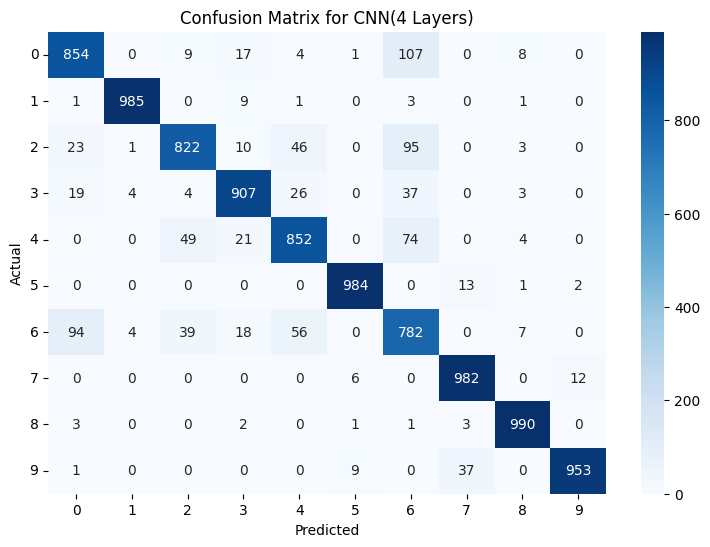

Test Accuracy: 91.11%
Precision: 0.9129
Recall: 0.9111
F1 Score: 0.9116


In [62]:

# Load the CSV data
train_df = pd.read_csv('fashion_mnist_train.csv')
val_df = pd.read_csv('fashion_mnist_val.csv')
test_df = pd.read_csv('fashion_mnist_test.csv')

# Separate features and labels
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
x_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values
x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN model with 4 convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 1 input channel -> 32 output channels
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # 32 input -> 64 output
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # 64 input -> 128 output
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # 128 input -> 256 output
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        # Pooling operation
        self.pool = nn.MaxPool2d(2, 2)

        # After 4 pooling layers: 28x28 -> 14x14 -> 7x7 -> 3x3 -> 1x1
        # Fully connected layer
        self.fc1 = nn.Linear(256 * 1 * 1, 256)
        # Fully connected layer
        self.fc2 = nn.Linear(256, 128)
        # Final output layer for 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Conv1 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Conv2 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Conv3 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv3(x)))
        # Conv4 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv4(x)))

        # Flatten 4D tensor to 2D
        x = x.view(x.size(0), -1)
        # Fully connected layer 1
        x = F.relu(self.fc1(x))
        # Fully connected layer 2
        x = F.relu(self.fc2(x))
        # Final layer (logits)
        x = self.fc3(x)
        return x

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# Test evaluation with additional metrics
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute confusion matrix for Logistic Regression
conf_matrix_CNN = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix for CNN(4 Layers)")
sns.heatmap(conf_matrix_CNN, cmap="Blues", annot=True, fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.yticks(rotation=360)
plt.ylabel("Actual")
plt.show()

# Compute metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
